In [1]:
# Import pandas library and the data set
import pandas as pd
df = pd.read_csv('breast cancer.csv')

In [2]:
# Have a look at the first five rows
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Have a look at the data set's info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Check if the data set has any missing values
df.isna().values.any()

True

In [5]:
# Retrieve columns having missing data
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
# Drop unnecessary columns
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

In [7]:
# Verify the columns
df.isna().values.any()

False

In [8]:
# Get X and y data sets
y = df.diagnosis.copy()
X = df.drop('diagnosis', axis=1).copy()

In [23]:
from sklearn.feature_selection import SelectPercentile, chi2
X_new = SelectPercentile(chi2, percentile=90).fit_transform(X, y)
print(X_new[:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 1.095e+00 9.053e-01 8.589e+00 1.534e+02 4.904e-02
  5.373e-02 1.587e-02 6.193e-03 2.538e+01 1.733e+01 1.846e+02 2.019e+03
  1.622e-01 6.656e-01 7.119e-01 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.435e-01 7.339e-01 3.398e+00 7.408e+01 1.308e-02
  1.860e-02 1.340e-02 3.532e-03 2.499e+01 2.341e+01 1.588e+02 1.956e+03
  1.238e-01 1.866e-01 2.416e-01 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 7.456e-01 7.869e-01 4.585e+00 9.403e+01 4.006e-02
  3.832e-02 2.058e-02 4.571e-03 2.357e+01 2.553e+01 1.525e+02 1.709e+03
  1.444e-01 4.245e-01 4.504e-01 2.430e-01 3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414e-01
  1.052e-01 2.597e-01 4.956e-01 1.156e+00 3.445e+00 2.723e+01 7.458e-02
  5.661e-02 1.867e-

In [72]:
# Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X = pd.DataFrame(data=X_scaled, columns=X.columns, index=X.index)

In [73]:
# Get the training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [76]:
# Import GridSearch and kNN
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Parameters for KNN
parameters = {
    'n_neighbors': range(5, 11),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': range(10, 26),
    'p': range(2, 11)
}

# Create a KNN object
knn = KNeighborsClassifier()

# Create a GridSearch object
grid_search = GridSearchCV(estimator=knn, param_grid=parameters, cv=5, n_jobs=-1)

# Fit the training set by the grid_search model
grid_search.fit(X_train, y_train)

# Print the best parameters
print(grid_search.best_params_)

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'p': 3, 'weights': 'uniform'}


In [79]:
# Fit the training data using the best parameters
best_knn = KNeighborsClassifier(**grid_search.best_params_)
best_knn.fit(X_train, y_train)

# Predicted y
predictions = best_knn.predict(X_test)

              precision    recall  f1-score   support

           B       0.96      0.99      0.97        72
           M       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



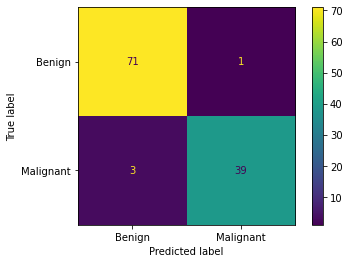

In [84]:
from sklearn.metrics import classification_report, plot_confusion_matrix

# Plot the confusion matrix
plot_confusion_matrix(best_knn, X_test, y_test, display_labels=['Benign', 'Malignant'])

# print classification report 
print(classification_report(y_test, predictions)) 